## ESE 101: Programming Module 2
### Radiation: Top-of-atmosphere (TOA) Radiative Fluxes
#### Dave Bonan, Jordan Benjamin, Tapio Schneider

In this module, you will plot top-of-atmosphere (TOA) radiative fluxes, describe key features of the Earth's radiative balance, and identify the role of clouds on radiation. Similar to last week, we will use output from a state-of-the-art climate model ([CESM2](http://www.cesm.ucar.edu/models/cesm2/)).

Some notes:
- **Run cells in this notebook by pressing `Ctrl+Enter`**
- **Remember to fill in cells marked `Answer:` and be on the lookout for places where you need to add code**<br>

In this notebook, the code is not all pre-prepared. You should you use concepts and plotting scrips from last week to help answer these questions. Please reach out to the TAs with any and all questions! Let's begin:

#### Import python packages required for this notebook:

In [1]:
import matplotlib as mpl        # Python's default plotting package https://matplotlib.org/
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs      # Mapping  package https://scitools.org.uk/cartopy/docs/latest/
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np              # Python's numerical and array calculations package https://numpy.org/
import math                     # Python's default math package https://docs.python.org/3/library/math.html
import xarray as xr             # Python package for labeled datasets and arrays

#### Define a function to plot data on a globe:

In [2]:
def cylindrical_equidistant_projection(lats,lons,data,ticks,c_ticks,cmap='RdYlBu_r',c_label='',title='',fig=None,ax=None):
    """
    A function to plot data on a globe
    """
    if fig is None:
        fig=plt.figure(figsize=(8, 5)) # initialize a figure
    
    lon2d, lat2d = np.meshgrid(lons, lats) # create 2D lat-lon grid
    if ax is None:
        ax = plt.axes(projection=ccrs.PlateCarree()) # create axes with assigned Plate Carree map projection
        
    ax.set_title(title,y=1.1) # add a plot title
    ax.set_global() # show the entire globe
    ax.coastlines() # plot coastlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1.5, color='gray', alpha=0.5, linestyle='--') # add lon/lat grid lines
    gl.bottom_labels = False # do not label longitudes on bottom
    gl.right_labels  = False  # do not lobal latitudes on right
    gl.xformatter = LONGITUDE_FORMATTER # format in longitude format
    gl.yformatter = LATITUDE_FORMATTER  # format in latitude format

    cs=ax.contourf(lons, lats, data,ticks,cmap=cmap) # plot data
    
    # create colorbar
    cax,kw = mpl.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.975) # add colorbar axes at bottom
    cbar=fig.colorbar(cs,cax=cax,orientation='horizontal',ticks=c_ticks)        # add horizontal colorbar to this axes
    cbar.set_label(c_label)                                                     # label colorbar

#### Now let's read monthly incoming shortwave radiation from CESM2:

In [3]:
filepath = 'rsdt_Amon_CESM2_01_12_1981_2012.nc'  # choose this dataset, monthly surface temperature data
incoming_shortwave_radiation = xr.open_dataset(filepath) # open the file
lon=incoming_shortwave_radiation['lon']
lat=incoming_shortwave_radiation['lat']
incoming_shortwave_radiation                             # examine its data

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 192, lon: 288, time: 12)
Coordinates:
  * time      (time) object 2010-01-15 12:00:00 ... 2010-12-15 12:00:00
  * lon       (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat       (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
Dimensions without coordinates: bnds
Data variables:
    lon_bnds  (lon, bnds) float64 ...
    lat_bnds  (lat, bnds) float64 ...
    rsdt      (time, lat, lon) float32 ...
Attributes:
    CDI:                    Climate Data Interface version 1.9.7.1 (http://mp...
    history:                Tue Sep 22 16:45:29 2020: cdo -ymonmean /export/d...
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    institution:            National Center for Atmospheric Research
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    case_id:                15
    cesm_casename:          b.e21.BHIST.f09_g17.CMIP6-historical.001
    contact:     

#### Let's plot the annual-mean incoming shortwave radiation:
Note, `rsdt` means you are looking at radiation (r) that is shortwave (s) and that is downward (d) at top of atmosphere (t).

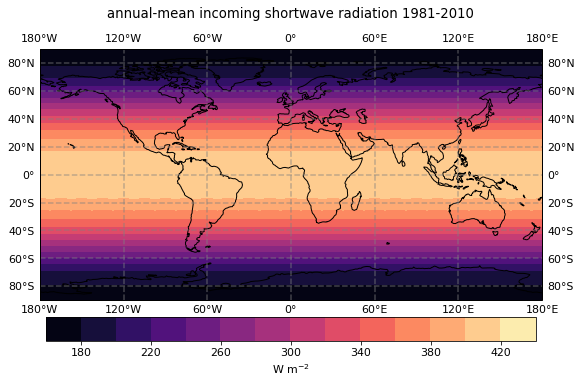

In [4]:
plt.rcParams.update({'font.size': 11})
fig = plt.figure(figsize=(9,6))
ann_mean = incoming_shortwave_radiation['rsdt'].mean('time')
title = 'annual-mean incoming shortwave radiation 1981-2010'
cylindrical_equidistant_projection(lat,lon,ann_mean,np.arange(160,460,20),np.arange(140,500,40),cmap='magma',c_label='W m$^{-2}$',title=title,fig=fig) # plot

#### Zonal-mean:
In the code block below, take the zonal-mean and plot the incoming shortwave radiation as a function of latitude.

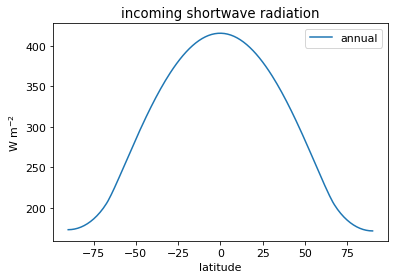

In [5]:
plt.figure()
ann_mean = incoming_shortwave_radiation['rsdt'].mean('time')
z_ann_mean = ann_mean.mean('lon')
plt.plot(lat,z_ann_mean,label='annual')
plt.xlabel('latitude')
plt.ylabel('W m$^{-2}$')
plt.title('incoming shortwave radiation')
plt.legend()

**Describe the latitudinal incoming shortwave radiation.**

<b> Answer: </b>

<div class="alert alert-block alert-warning">
Answers include but are not limited to: the latitudinal symmetry about the equator, with a slight skew to the northern hemisphere. This slight assymetry is due to the fact that earth is due to the tilt of the Earth.
</div>

#### Let's examine the net-shortwave radiation and outgoing longwave radiation:
Again, `rsut` means you are looking at radiation (r) that is shortwave (s) and that is upward (u) at top of atmosphere (t).

In [6]:
filepath = 'rsut_Amon_CESM2_01_12_1981_2012.nc'
outgoing_shortwave_radiation = xr.open_dataset(filepath)
rsdt = incoming_shortwave_radiation['rsdt']
rsut = outgoing_shortwave_radiation['rsut']
netSW = rsdt-rsut

Make a spatial plot of the annual-mean net-shortwave radiation.

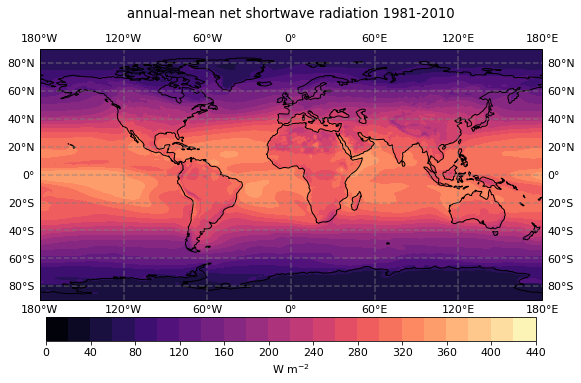

In [7]:
plt.rcParams.update({'font.size': 11})
fig = plt.figure(figsize=(9,6))
ann_mean = netSW.mean('time')
title = 'annual-mean net shortwave radiation 1981-2010'
cylindrical_equidistant_projection(lat,lon,ann_mean,np.arange(0,460,20),np.arange(0,500,40),cmap='magma',c_label='W m$^{-2}$',title=title,fig=fig) # plot

**Describe key feautres of the net-shortwave radiation. Which regions have less incoming shortwave radiation and which regions have more? Why do the subtropics look different from the equator?**

<b> Answer: </b>

<div class="alert alert-block alert-warning">
Answers include, but are not limited to: net shortwave radiation spatial pattern resembles the incoming shortwave radiation one, but with smaller scale regional variations especially over the continents. The polar region has less net solar radiation due to strong ice-albedo effect and the subtropical regions have more net shortwave radiation. The subtropics actually have a little more net shortwave radiation than the equator, because there are lots of convection and clouds at the equator, increaing the albedo and thus the reflection of solar radiation.
</div>

Now let's look at the outgoing longwave radiation.
Outgoing longwave radiation is `rlut` which means you are looking at radiation (r) that is longwave (l) and that is upward (u) at top of atmosphere (t).

In [8]:
filepath = 'rlut_Amon_CESM2_01_12_1981_2012.nc'
outgoing_longwave_radiation = xr.open_dataset(filepath)

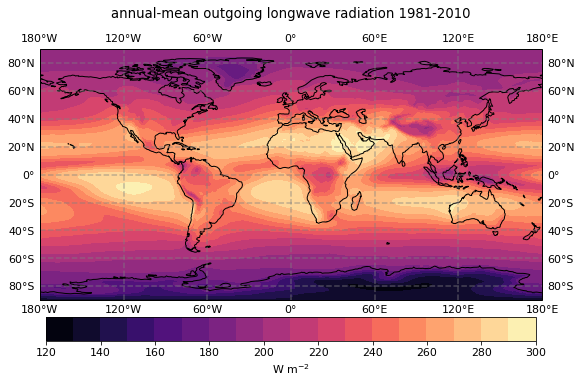

In [9]:
fig = plt.figure(figsize=(9,6))
ann_mean = outgoing_longwave_radiation['rlut'].mean('time')
title = 'annual-mean outgoing longwave radiation 1981-2010'
cylindrical_equidistant_projection(lat,lon,ann_mean,np.arange(120,310,10),np.arange(120,330,20),cmap='magma',c_label='W m$^{-2}$',title=title,fig=fig) # plot

**Describe key feautres of the outgoing longwave radiation (OLR). Which regions have less OLR and which regions have more? Why do subtropical regions show up so clearly?**

<b> Answer: </b>

<div class="alert alert-block alert-warning">
Answers include, but are not limited to: the outgoing longwave radiation is the smallest at the poles and the greatest at the subtropics due to the temperature dependence. The subtripics have the greatest values because they are the warmest, while the poles have the coldest since they are the coldest. Note, there are variations where clouds play a role (e.g., off the coast of Chile).
</div>

Now, let's take at look at the top-of-atmosphere budget, which is the sum of net-shortwave and outgoing longwave radiation:

$F=S^{\downarrow}−S^{\uparrow} - F^{\uparrow}$

In [10]:
rsdt = incoming_shortwave_radiation['rsdt']
rsut = outgoing_shortwave_radiation['rsut']
rlut = outgoing_longwave_radiation['rlut']
F = rsdt - rsut - rlut

Now, plot the annual-mean $F$.

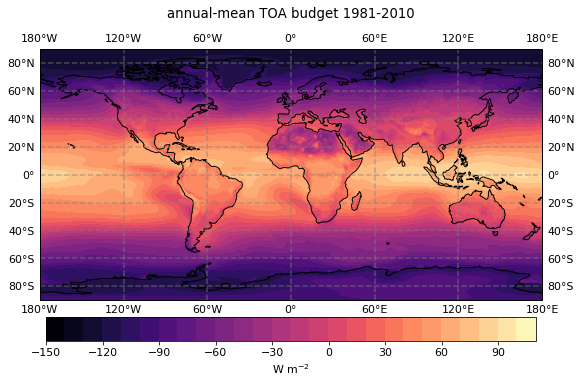

In [11]:
fig = plt.figure(figsize=(9,6))
ann_mean = F.mean('time')
title = 'annual-mean TOA budget 1981-2010'
cylindrical_equidistant_projection(lat,lon,ann_mean,np.arange(-150,120,10),np.arange(-150,120,30),cmap='magma',c_label='W m$^{-2}$',title=title,fig=fig) # plot

**Describe key features of the top-of-atmosphere budget.**

<b> Answer: </b>

<div class="alert alert-block alert-warning">
Answers include, but are not limited to: We see positive energy fluxes (going into earth) at the equator and subtropics, while negative energy fluxes at higher latitudes. This drives an energy imbalance and heat transport (as we will see later).
</div>

One cool thing we can do is estimate the longwave and shortwave cloud radiative effect and see how this affects radiaiton balance. Clouds can act as a greenhouse ingredient to warm the Earth by trapping outgoing longwave infrared radiative flux at the top of the atmosphere. Clouds can also enhance the planetary albedo by reflecting shortwave solar radiative flux back to space to cool the Earth. The net effect of the two competing processes depends on the height, type, and the optical properties of the clouds. To estimate this effect we can use "clear-sky" radiation, which is radiation in the absence of clouds. We have provided this output, but one can calculate this themselves (see below).

Let $F=S^{\downarrow}−S^{\uparrow} - F^{\uparrow}$ be the net incoming radiation at top-of-atmopshere (TOA). Suppose that the average flux in the portion of the sky without clouds is $F_{clear}$. We will call the flux in the cloudy portion of the sky $F_{cloud}$. Then the total flux is a weighted sum:
$$ 
F=(1−c)F_{clear}+cF_{cloud}
$$ 
 
where  $0≤c≤1$  is the cloud fraction, i.e. the fraction of the sky covered by cloud. We can also break this up into longwave and shortwave components:
$$F_{cloud}=L_{cloud}+S_{cloud}$$
 
$$L_{cloud}=−\big((1−c) F^{\uparrow}_{clear}+c F^{\uparrow}_{cloud}\big)$$
$$S_{cloud}=+\big((1−c) (S^{\downarrow}_{clear}−S^{\uparrow}_{clear})+c (S^{\downarrow}_{cloud}−S^{\uparrow}_{cloud})\big)$$

Now, let's look at the seperation of this using model output to identify the spatial structure of cloud radiative effects. We will go through the shortwave cloud radiative effect at the top-of-atmosphere and you will implement the longwave cloud radiative effect at the top-of-atmosphere.

In [12]:
filepath = 'rsdt_Amon_CESM2_01_12_1981_2012.nc'
file = xr.open_dataset(filepath)
rsdt = file['rsdt']

filepath = 'rsut_Amon_CESM2_01_12_1981_2012.nc'
file = xr.open_dataset(filepath)
rsut = file['rsut']

F_SW_all = rsdt-rsut

filepath = 'rsdt_Amon_CESM2_01_12_1981_2012.nc'
file = xr.open_dataset(filepath)
rsdt = file['rsdt']

filepath = 'rsutcs_Amon_CESM2_01_12_1981_2012.nc'
file = xr.open_dataset(filepath)
rsutcs = file['rsutcs']

F_SW_clear = rsdt-rsutcs

F_SW_CRE = F_SW_all-F_SW_clear

Now that we have the shortwave cloud radiative effect, let's plot it. If you are interested, explore what this looks like in the wintertime versus summertime.

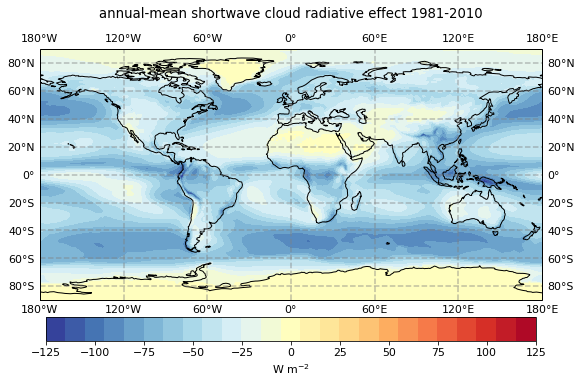

In [13]:
fig = plt.figure(figsize=(9,6))  
F_SW_CRE_ann_mean = F_SW_CRE.mean('time')
title = 'annual-mean shortwave cloud radiative effect 1981-2010'
cylindrical_equidistant_projection(lat,lon,F_SW_CRE_ann_mean,np.arange(-125,135,10),np.arange(-125,175,25),cmap='RdYlBu_r',c_label='W m$^{-2}$',title=title,fig=fig) # plot

**Describe key features of the shortwave cloud radiative effect (SWCRE). What is the net effect of clouds in terms of shortwave radiation? Where do clouds have the largest effect on shortwave radiation (hint: look at the storm track regions)?**

<b> Answer: </b>

<div class="alert alert-block alert-warning">
Answers include, but are not limited to: the net effect of clouds on shortwave radiation is reflection. Clouds reduce the shortwave radiation received at the top of the atmosphere. The reflection effect is particularly strong at the equator, which is due to the ITCZ and thus abundent cloud cover. The largest reflection effect happens at the midlatitude storm tracks, which correspond to westerly winds. In particular, at the southern ocean and the northen Pacific/Atlantic, coulds reflect plenty of solar radiation back to space.
</div>

Now, do the same for the longwave cloud radiative effect.

In [14]:
filepath = 'rlut_Amon_CESM2_01_12_1981_2012.nc'
file = xr.open_dataset(filepath)
rlut = file['rlut']

filepath = 'rlutcs_Amon_CESM2_01_12_1981_2012.nc'
file = xr.open_dataset(filepath)
rlutcs = file['rlutcs']

F_LW_CRE = -rlut-(-rlutcs)

Now, plot the annual-mean longwave cloud radiative effect.

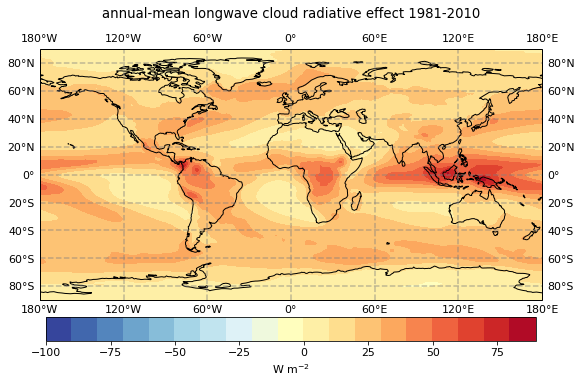

In [15]:
# --- code ---
fig = plt.figure(figsize=(9,6))  
F_LW_CRE_ann_mean = F_LW_CRE.mean('time')
title = 'annual-mean longwave cloud radiative effect 1981-2010'
cylindrical_equidistant_projection(lat,lon,F_LW_CRE_ann_mean,np.arange(-100,100,10),np.arange(-100,175,25),cmap='RdYlBu_r',c_label='W m$^{-2}$',title=title,fig=fig) # plot

**Describe key features of the longwave cloud radiative effect (LWCRE). What is the net effect of clouds in terms of longwave radiation? Where do clouds have the largest effect on longwave radiation?**

<b> Answer: </b>

<div class="alert alert-block alert-warning">
Answers include, but are not limited to: the net effect of clouds on longwave radiation is capping. It captures the outgoing longwave radiation from earth and prevent that from escaping into the space, one can see this at the cloud tops. This capping effect is particularly strong along the equator ITCZ, especially at the eastern Pacific basin, where the cloud cover is the most abundent. We also see that this capping effect is lowest at the subtropics, where the air is too dried out to form enough clouds.
</div>

Now, let's use what we did last week to calculate Arctic versus global cloud radiative effects.

In [16]:
weight  = np.cos(np.deg2rad(lat))
weight  = weight/np.sum(weight)
F_SW_CRE_ann_mean_weight = F_SW_CRE_ann_mean * weight

The global shortwave cloud radiative effect is:

In [17]:
F_SW_CRE_ann_mean_weight.mean(['lat','lon'])

<xarray.DataArray ()>
array(-0.25138899)

which means there is a strong cooling effect.

Now, let's examine the Arctic versus global. The reason is that clouds appear to have different roles in different regions. To do this, calculate the zonal-mean shortwave cloud radiative effect and remove all values below 65°N.

In [18]:
N65 = np.where(lat>65)[0][0]
z=np.nanmean(F_SW_CRE_ann_mean_weight[N65:,:],axis=1)
np.nanmean(z)

-0.04809704377578393

There is a slight cooling effect in the Arctic. Do this for the longwave component. Which one dominates? What is the global longwave cloud radiative effect?

In [19]:
F_LW_CRE_ann_mean_weight = F_LW_CRE_ann_mean * weight
N65 = np.where(lat>65)[0][0]
z=np.nanmean(F_LW_CRE_ann_mean_weight[N65:,:],axis=1)
print(np.nanmean(z))

F_LW_CRE_ann_mean_weight = F_LW_CRE_ann_mean * weight
z=np.nanmean(F_LW_CRE_ann_mean_weight[:,:],axis=1)
np.nanmean(z)

0.02431970797355257


0.12391329063352922

<b> Answer: </b>

<div class="alert alert-block alert-warning">
According to the longwave radiation calculation, there is a slight heating effect in the Arctic. However, this magnitude is smaller and thus the cooling effect still dominates. Globally, the longwave component of clouds warms climate, though to a lesser degree than the shortwave effect.

</div>

Finally, something neat we can do is estimate albedo as:
    
$$\alpha = \frac{S^{\uparrow}_\textrm{clear}}{S^{\downarrow}_\textrm{clear}}$$

Let's plot albedo and explore its seasonal variations as well.

In [20]:
filepath = 'rsdt_Amon_CESM2_01_12_1981_2012.nc'
file = xr.open_dataset(filepath)
rsdt = file['rsdt']

filepath = 'rsutcs_Amon_CESM2_01_12_1981_2012.nc'
file = xr.open_dataset(filepath)
rsutcs = file['rsutcs']

alpha = rsutcs/rsdt

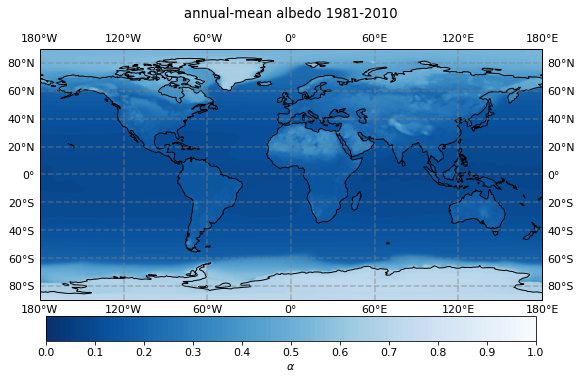

In [21]:
fig = plt.figure(figsize=(9,6))
ann_mean = alpha.mean('time')
title = 'annual-mean albedo 1981-2010'
cylindrical_equidistant_projection(lat,lon,ann_mean,np.arange(0,1.01,0.01),np.arange(0,1.1,0.1),cmap='Blues_r',c_label='$\\alpha$',title=title,fig=fig) # plot

**Describe key feautres of the Earth's albedo. Where is the albedo highest? Where is it lowest?**

<b> Answer: </b>

<div class="alert alert-block alert-warning">
The albedo is highest at the poles due to the strong reflective effect by sea ice. It is also strong over some areas on the continents, for example, the Sahara desert, where the sands are also good reflectors; and the Tibetan plateau, where there is permanent snow and glaciers. The albedo is lowest across the ocean surface in general.
</div>

Now, finally, let's explore the seasonal variations of albedo. In the code block below plot $\alpha$ for DJF, MAM, JJA, SON. See last week if you forgot how to perform seasonal means.

/opt/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


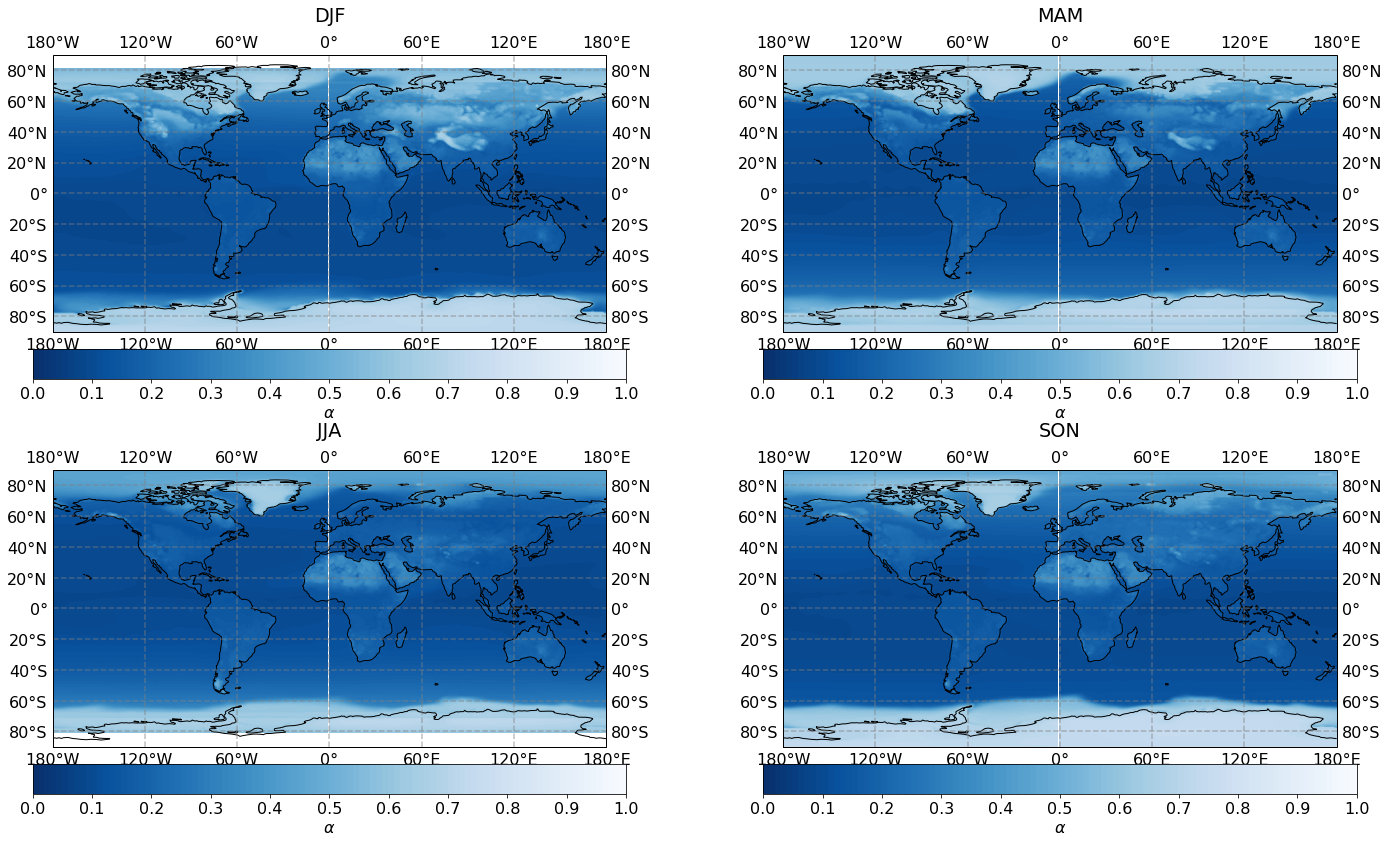

In [22]:
# --- code ---
plt.rcParams.update({'font.size': 16})  
alpha_seasonal = alpha.groupby('time.season').mean()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24,14), subplot_kw={'projection': ccrs.PlateCarree()})
for i, season in enumerate(('DJF', 'MAM', 'JJA', 'SON')):
    alpha_data = alpha_seasonal.sel(season=season)
    cylindrical_equidistant_projection(lat,lon,alpha_data,np.arange(0,1.01,0.01),np.arange(0,1.1,0.1),cmap='Blues_r',c_label='$\\alpha$',title=season,fig=fig,ax=axes.flatten()[i]) # plot


**Describe seasonal features of albedo. What is going on in the polar regions?**

<b> Answer: </b>

<div class="alert alert-block alert-warning">
In the Northern Hemisphere, from DJF to JJA there is a consistent decrease of albedo on the continents due to the fact that snow is melting and the fact that the albedo starts to slowly ramp up in SON. At the north pole, the there is no albedo because of polar night. The polar albedo is the strongest in MAM. Similar features are also observed in the Southern Hemisphere.
</div>